In [86]:
%load_ext autoreload
%autoreload 2

from script.Layers import *
from script.Optimization import *
from script.Network import *
from util.plots import *

import random
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from script import Layers
%matplotlib inline
random.seed(5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<br/>
# Generate some dataset

## Read in data

### Option 1: Simple dataset

In [87]:
X, y = make_moons(1000, noise = 0.1)
print(X.shape, y.shape)

(1000, 2) (1000,)


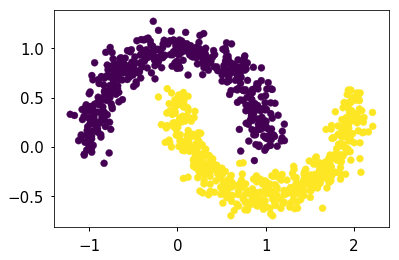

In [88]:
plt.scatter(X[:,0], X[:,1], c = y)

### Option 2: MNIST

In [89]:
# Only using the dataset, not using any function
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [90]:
X = mnist.train.images[:3000].astype(np.float64)
y = np.array([ np.where(r==1)[0][0] for r in mnist.train.labels[:3000]], np.int32)
print(X.shape, y.shape)

(3000, 784) (3000,)


### Option 3: IRIS

In [91]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('./IRIS_data/iris_training.csv')
df2 = pd.read_csv('./IRIS_data/iris_test.csv')
df = pd.concat([df1,df2])
df = pd.concat([df,df, df])

In [92]:
X = np.array(df.iloc[:,:4])
X.shape

(450, 4)

In [93]:
y = np.array(df.iloc[:,-1])
y.shape

(450,)

## Split training, validation, test set

In [94]:
def train_test_split(X, y, test_size = 0.2, random_state = 42):
    import random
    num_examples = X.shape[0]
    inds = list(range(num_examples))
    test_ind  = random.sample(inds, int(test_size * num_examples))
    train_ind = [ind for ind in inds if ind not in test_ind]
    return X[train_ind,:], y[train_ind], X[test_ind,:], y[test_ind]

In [95]:
X_train_val, y_train_val, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, y_train, X_val, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(252, 4) (252,) (108, 4) (108,) (90, 4) (90,)


# Design Network

### Option 1: Simple Example

In [96]:
network = Network()
layers = []
layers.append(Layer(activation_function = Tanh(), num_neurons = 5))
layers.append(Layer(activation_function = Tanh(), num_neurons = 5))
layers.append(Layer(activation_function = Softmax(), num_neurons = 2))
for layer in layers:
    network.add(layer)

### Option 2: MNIST

In [97]:
network = Network()
layers = []
layers.append(Layer(activation_function = Tanh(), num_neurons = 20))
layers.append(Layer(activation_function = Softmax(), num_neurons = 10))
for layer in layers:
    network.add(layer)

### Option 3: IRIS

In [104]:
del network
network = Network()
layers = []
layers.append(Layer(activation_function = ReLU(), num_neurons = 10, batch_norm = True))
layers.append(Layer(activation_function = ReLU(), num_neurons = 10, batch_norm = True, dropout_p = 0.8))
layers.append(Layer(activation_function = Softmax(), num_neurons = 3, dropout_p = 0.8))
for layer in layers:
    network.add(layer)

<br/>
# Train network

### Training Parameters

In [105]:
#Model training params:
batch_size = 252 # Batch size for gradient update 
num_iter = 500 # Number of iterations
learning_rate = 0.001 # Learning Rate
lambda_ = 0. # Regularization parameter

#Output params
CAL_STEP = 25
PRINT_STEP = 50

### Initialize and Train

In [106]:
network.initialize(input = X_train, y = y_train, batch_size = batch_size)
train_loss, train_acc, val_loss, val_acc = network.train(
                     num_iter = num_iter, 
                     learning_rate = learning_rate, 
                     batch_size = batch_size, 
                     rand_ = True, 
                     lambda_ = lambda_,
                     optimizer = 'Vanilla',
                     Val_X = X_val, 
                     Val_y = y_val,
                     CAL_STEP = CAL_STEP, 
                     PRINT_STEP = PRINT_STEP
                     )

Train at Iter  0: loss - 1.543, Acc - 0.278
Validation at Iter  0: loss - 1.287, Acc - 0.315
Train at Iter 50: loss - 0.072, Acc - 0.980
Validation at Iter 50: loss - 0.078, Acc - 0.963
Train at Iter 100: loss - 0.032, Acc - 0.988
Validation at Iter 100: loss - 0.061, Acc - 0.981
Train at Iter 150: loss - 0.044, Acc - 0.988
Validation at Iter 150: loss - 0.057, Acc - 0.981
Train at Iter 200: loss - 0.043, Acc - 0.984
Validation at Iter 200: loss - 0.048, Acc - 0.991
Train at Iter 250: loss - 0.031, Acc - 0.984
Validation at Iter 250: loss - 0.047, Acc - 0.991
Train at Iter 300: loss - 0.022, Acc - 0.996
Validation at Iter 300: loss - 0.045, Acc - 0.991
Train at Iter 350: loss - 0.013, Acc - 0.992
Validation at Iter 350: loss - 0.043, Acc - 0.991
Train at Iter 400: loss - 0.060, Acc - 0.984
Validation at Iter 400: loss - 0.047, Acc - 0.963
Train at Iter 450: loss - 0.046, Acc - 0.972
Validation at Iter 450: loss - 0.041, Acc - 0.972


# Result Evaluation

## Plot loss and accuracy

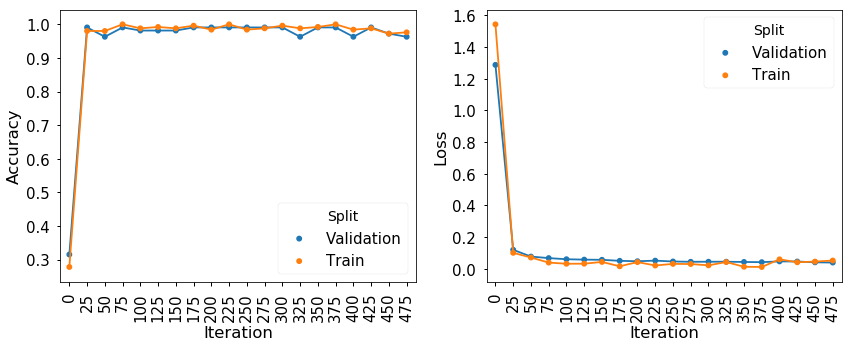

In [107]:
plot_loss_acc(train_loss, train_acc, val_loss, val_acc, CAL_STEP, num_iter)

## Apply Model to Test Dateset

In [108]:
acc, loss = network.evaluate(X_test, y_test)
print('Accuracy on test dataset is: ', "%.4f" %acc)

Accuracy on test dataset is:  0.9444


## Visualize Decision Boundary for Simple Example

In [109]:
# Only for synthetic example
# plot_decision_boundary(lambda x: network.predict(x), X, y)
# plt.title("Decision Boundary for hidden layer size 3")
# plt.show()

## Gradient check

The purpose is to confirm that gradient calculation was correct

In [110]:
# Re-initialize network, with same X and y, fixed input, no weight update, no regularization
network.initialize(input = X, y = y, batch_size = batch_size)
a,b,c,d = network.train(num_iter = 500, learning_rate = 0., batch_size = batch_size, rand_ = False, lambda_ = 0.)

Train at Iter  0: loss - 1.160, Acc - 0.400
Train at Iter 100: loss - 0.038, Acc - 0.980
Train at Iter 200: loss - 0.038, Acc - 0.980
Train at Iter 300: loss - 0.038, Acc - 0.980
Train at Iter 400: loss - 0.038, Acc - 0.980


Perturbate X[0,0] by +/- 1e5

In [111]:
X_plus = X.copy()
X_plus[0,0] += 1e-5
X_minus = X.copy()
X_minus[0,0] -= 1e-5

Calculate gradient

In [112]:
_, loss_plus = network.evaluate(X_plus, y)
_, loss_minus = network.evaluate(X_minus, y)
c_gradient = (loss_plus - loss_minus) / (2e-5) * X.shape[0]
print('Calculated Gradient: ', c_gradient)

Calculated Gradient:  -0.200366787849


In [113]:
a_gradient = network.layers[0].dX[0,0]
print('Analytical Gradient: ' , a_gradient)

Analytical Gradient:  -0.200366786845


In [114]:
print('Relative error: ', abs(c_gradient - a_gradient) / max(c_gradient, a_gradient))

Relative error:  -5.00939406823e-09


A better implementation will be checking gradients also at following steps, and for all parameters